In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\numai/nltk_data'
    - 'D:\\Python\\nltk_data'
    - 'D:\\Python\\share\\nltk_data'
    - 'D:\\Python\\lib\\nltk_data'
    - 'C:\\Users\\numai\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [2]:
import nltk

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\numai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
stop_words = set(stopwords.words('english'))

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.  Downloading scikit_learn-1.3.0-cp39-cp39-win_amd64.whl (9.3 MB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2



In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
df = pd.read_csv('covidtweets.csv')

In [12]:
df.head()

,timestamp,tweet_text,all_hashtags,followers_count,sentaiment_score
0,4/29/20 23:58,b'#HealthcareHeroes we love you. THANK YOU FOR...,"['HealthcareHeroes', 'CoronavirusUSA', 'Courag...",79,0.500000
1,4/29/20 23:57,b'When you can finally cook for your family an...,"['COVID19', 'CoronavirusUSA', 'covidsurvivor',...",312,0.431429
2,4/29/20 23:56,b'In support of our #HealthcareHeroes treating...,"['HealthcareHeroes', 'COVID19', 'COVID', 'Nurs...",65,0.133333
3,4/29/20 23:55,b'Who is behind the #coronavirus social distan...,"['coronavirus', 'CoronavirusUSA', 'Coronavirus...",1432,-0.183333
4,4/29/20 23:55,b'#CoronavirusUSA Tonights stats - https://t....,['CoronavirusUSA'],7230,0.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25197 entries, 0 to 25196
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         25197 non-null  object 
 1   tweet_text        25197 non-null  object 
 2   all_hashtags      25197 non-null  object 
 3   followers_count   25197 non-null  int64  
 4   sentaiment_score  25197 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 984.4+ KB


In [14]:
df.shape()

TypeError: 'tuple' object is not callable

In [15]:
df.isnull().sum()

timestamp           0
tweet_text          0
all_hashtags        0
followers_count     0
sentaiment_score    0
dtype: int64

In [17]:
df.columns

Index(['timestamp', 'tweet_text', 'all_hashtags', 'followers_count',
       'sentaiment_score'],
      dtype='object')

In [18]:
text_df = df.drop(['timestamp',  'all_hashtags', 'followers_count',
       'sentaiment_score'], axis=1)
text_df.head()

,tweet_text
0,b'#HealthcareHeroes we love you. THANK YOU FOR...
1,b'When you can finally cook for your family an...
2,b'In support of our #HealthcareHeroes treating...
3,b'Who is behind the #coronavirus social distan...
4,b'#CoronavirusUSA Tonights stats - https://t....


In [19]:
print(text_df['tweet_text'].iloc[0],"\n")
print(text_df['tweet_text'].iloc[1],"\n")
print(text_df['tweet_text'].iloc[2],"\n")
print(text_df['tweet_text'].iloc[3],"\n")
print(text_df['tweet_text'].iloc[4],"\n")

b'#HealthcareHeroes we love you. THANK YOU FOR ALL YOU DO AND ARE DOING IN THIS FIGHT AGAINST #CoronavirusUSA YOUR #CourageIsBeautiful God bless you, you are in our prayers.' 

b'When you can finally cook for your family and your kids put in their request. Then they say,  "Mama, I\'m glad you\'re not sick anymore, this my favorite".. lol #COVID19 #CoronavirusUSA #covidsurvivor #lovemyfamily' 

b'In support of our #HealthcareHeroes treating #COVID19 patients. FREE group memberships. Entire course library + #COVID specific content. Form:https://t.co/5L6mQcoGAD #NursesCOVID19 #COVIDfoam #FOAMed #medtwitter #EmergencyMedicine #FirstResponders #coronavirususa #doctors #nurses' 

b'Who is behind the #coronavirus social distancing protests? https://t.co/NBKIn8tSUX #CoronavirusUSA #CoronavirusPandemic #COVID19 #VoteHimOUT #VoteBlueToEndThisNightmare #VoteBlue2020 #WakeUpAmerica #WakeUP' 

b'#CoronavirusUSA  Tonights stats - https://t.co/nNZh9txKFy' 



In [20]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25197 entries, 0 to 25196
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  25197 non-null  object
dtypes: object(1)
memory usage: 197.0+ KB


In [21]:

text_df.rename(columns = {'tweet_text':'text'}, inplace = True)

In [22]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25197 entries, 0 to 25196
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25197 non-null  object
dtypes: object(1)
memory usage: 197.0+ KB


In [23]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [24]:
text_df.text = text_df['text'].apply(data_processing)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\numai/nltk_data'
    - 'D:\\Python\\nltk_data'
    - 'D:\\Python\\share\\nltk_data'
    - 'D:\\Python\\lib\\nltk_data'
    - 'C:\\Users\\numai\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [25]:
text_df = text_df.drop_duplicates('text')

In [26]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [27]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [28]:
text_df.head()

,text
0,b'#HealthcareHeroes we love you. THANK YOU FOR...
1,b'When you can finally cook for your family an...
2,b'In support of our #HealthcareHeroes treating...
3,b'Who is behind the #coronavirus social distan...
4,b'#CoronavirusUSA Tonights stats - https://t....


In [29]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [31]:
text_df.head(10)

,text,polarity
0,b'#HealthcareHeroes we love you. THANK YOU FOR...,0.500000
1,b'When you can finally cook for your family an...,0.431429
2,b'In support of our #HealthcareHeroes treating...,0.133333
3,b'Who is behind the #coronavirus social distan...,-0.183333
4,b'#CoronavirusUSA Tonights stats - https://t....,0.000000
5,b'I really cannot wait until everything goes b...,0.125000
6,"b""Susan Rice: Kushner's comment would be laugh...",-0.416667
7,"b""\xf0\x9f\xa4\xa8......don't they have school...",-0.375000
8,b'Here is my CONNECTICUT COVID-19 UPDATE for W...,0.500000
9,b'I am really wishing I had a source of inform...,0.200000


In [32]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [33]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [34]:
text_df.head()

,text,polarity,sentiment
0,b'#HealthcareHeroes we love you. THANK YOU FOR...,0.500000,Positive
1,b'When you can finally cook for your family an...,0.431429,Positive
2,b'In support of our #HealthcareHeroes treating...,0.133333,Positive
3,b'Who is behind the #coronavirus social distan...,-0.183333,Negative
4,b'#CoronavirusUSA Tonights stats - https://t....,0.000000,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

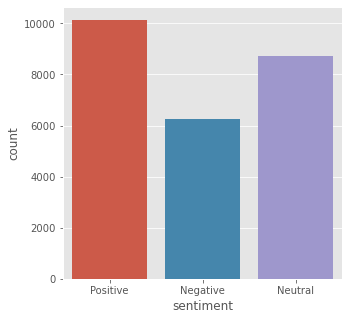

In [35]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

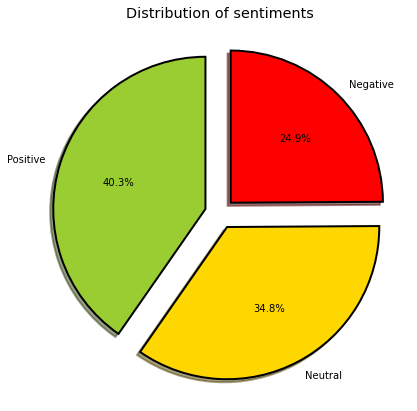

In [36]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [37]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
21781,b'Look what I found on @eBay! https://t.co/Qew...,1.0,Positive
12565,b'What the perfect pandemic response looks lik...,1.0,Positive
18028,b'@realDonaldTrump take Your Own Advise!!! #Ta...,1.0,Positive
9055,b'The perfect storm of why we don\xe2\x80\x99t...,1.0,Positive
13777,b'REINFECTION!!! \xf0\x9f\x98\x94. South Kore...,1.0,Positive


In [39]:
from wordcloud import WordCloud 

In [40]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()


ValueError: Only supported for TrueType fonts

<Figure size 1440x1080 with 0 Axes>

In [41]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
5160,"b""Wouldn't it make logical sense that letting ...",-1.387779e-17,Negative
17285,b'#COVID19 #CoronavirusUSA #COVIDIOTS I don\xe...,-1.387779e-17,Negative
3599,b'You know you\xe2\x80\x99ve been #Covid_19 #l...,-2.775558e-17,Negative
15226,"b""Hey Birx- All these improvements you are see...",-1.388889e-03,Negative
12192,b'@realDonaldTrump #Briefing_COVID19 #coronavi...,-2.083333e-03,Negative


In [42]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
4,b'#CoronavirusUSA Tonights stats - https://t....,0.0,Neutral
17070,"b""Under the outbreak of COVID-19 pandemic thre...",0.0,Neutral
17051,b'@SkyNews Blame it on this \xf0\x9f\xa4\xa1. ...,0.0,Neutral
17058,b'Is anyone else getting this error message on...,0.0,Neutral
17062,b'Tucker Carlson is spot on about #GretchenWhi...,0.0,Neutral


In [43]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [44]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 357486

First 20 features:
 ['00', '00 30pm', '00 38', '00 am', '00 april', '00 cases', '00 deposit', '00 edt', '00 from', '00 https', '00 in', '00 more', '00 no', '00 pdt', '00 per', '00 pm', '00 presser', '00 restaurants', '00 so', '00 trumppressrally']


D:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  return fun(*args, **kwargs)


In [45]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (20103, 357486)
Size of y_train: (20103,)
Size of x_test: (5026, 357486)
Size of y_test: (5026,)


In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 82.55%


In [50]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 844  205  195]
 [  57 1639   94]
 [ 109  217 1666]]


              precision    recall  f1-score   support

    Negative       0.84      0.68      0.75      1244
     Neutral       0.80      0.92      0.85      1790
    Positive       0.85      0.84      0.84      1992

    accuracy                           0.83      5026
   macro avg       0.83      0.81      0.81      5026
weighted avg       0.83      0.83      0.82      5026



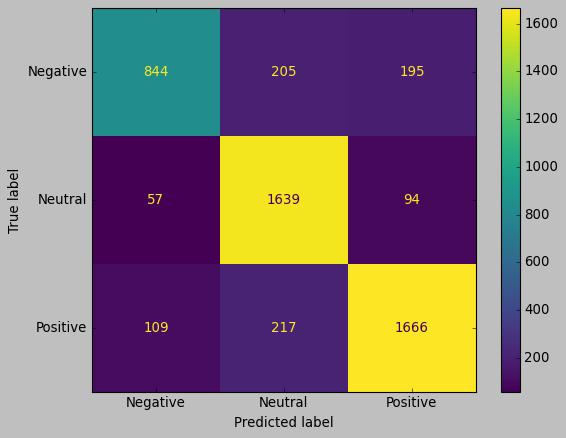

In [51]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [54]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [55]:
y_pred = grid.predict(x_test)

In [56]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 82.61%


In [57]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 868  185  191]
 [  69 1614  107]
 [ 114  208 1670]]


              precision    recall  f1-score   support

    Negative       0.83      0.70      0.76      1244
     Neutral       0.80      0.90      0.85      1790
    Positive       0.85      0.84      0.84      1992

    accuracy                           0.83      5026
   macro avg       0.83      0.81      0.82      5026
weighted avg       0.83      0.83      0.82      5026



In [58]:
from sklearn.svm import LinearSVC

In [59]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [60]:

svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))


test accuracy: 83.96%


In [61]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 873  188  183]
 [  44 1664   82]
 [ 108  201 1683]]


              precision    recall  f1-score   support

    Negative       0.85      0.70      0.77      1244
     Neutral       0.81      0.93      0.87      1790
    Positive       0.86      0.84      0.85      1992

    accuracy                           0.84      5026
   macro avg       0.84      0.83      0.83      5026
weighted avg       0.84      0.84      0.84      5026



In [62]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [63]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [64]:
y_pred = grid.predict(x_test)

In [65]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.96%


In [66]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 873  188  183]
 [  44 1664   82]
 [ 108  201 1683]]


              precision    recall  f1-score   support

    Negative       0.85      0.70      0.77      1244
     Neutral       0.81      0.93      0.87      1790
    Positive       0.86      0.84      0.85      1992

    accuracy                           0.84      5026
   macro avg       0.84      0.83      0.83      5026
weighted avg       0.84      0.84      0.84      5026

